<a href="https://colab.research.google.com/github/Omarlsg98/colab-notebooks/blob/main/financial_music.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup


In [ ]:
!pip install yahoo_fin

     |████████████████████████████████| 81 kB 3.9 MB/s 
     |████████████████████████████████| 87 kB 5.8 MB/s 
     |████████████████████████████████| 76 kB 4.2 MB/s 
     |████████████████████████████████| 79 kB 7.1 MB/s 
     |████████████████████████████████| 127 kB 27.1 MB/s 
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13503 sha256=146d940a83c733cb1eb6c8cefa603b8eac736a62d70b4a74f73f501bbfcf5a23
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9daa9d06315704209b2c5d032031
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24591 sha256=67dd1242c8fe515e548a7b1bdec32ced401ac1e07bb38befebd0198021a9c0a2
  Stored in directory: /root/.cache/pip/wheels/9c/aa/cc/f2228050ccb40f22144b073f15a2c84f11204f29fc0dce028e
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6065 sha256=235441412055b2715c0bb3ae8f7b58c0cf8df1cb1589662da698f62b1e60bb60
  Stored in directory: /root/.cac

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

DATA_SOURCE = "yahoo_fin"
DRIVE_PATH = "drive/MyDrive/1l Proyectos personales/ADPM/MVP/"
def create_drive_dirs(dirname):
  path = os.path.join(DRIVE_PATH, dirname)
  os.makedirs(path, exist_ok=True)
  return path
DATASET_PATH = create_drive_dirs("datasets")
RAWDATA_PATH = create_drive_dirs("raw_data")
MODELS_PATH = create_drive_dirs("models")

# Where to save the figures
IMAGES_PATH = os.path.join(DRIVE_PATH, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, custom_dir=None, tight_layout=True, fig_extension="png", resolution=300):
    if custom_dir != None:
      pre_path=os.path.join(IMAGES_PATH, custom_dir)
      create_drive_dirs(pre_path)
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

#Get data

In [ ]:
#meta data:
INICIAL_DATE="2000-01-01"
FINAL_DATE="2021-01-01"
CUT_TRAIN_DATE='2019-01-02'
CUT_TEST_DATE='2019-01-02'
TIMESTEPS = 150

In [ ]:
import yahoo_fin.stock_info as stocks

In [ ]:
os.listdir(RAWDATA_PATH)

['AAPL_2000-01-01_to_2021-01-01.csv',
 'AMGN_2000-01-01_to_2021-01-01.csv',
 'AXP_2000-01-01_to_2021-01-01.csv',
 'BA_2000-01-01_to_2021-01-01.csv',
 'CRM_2000-01-01_to_2021-01-01.csv',
 'CAT_2000-01-01_to_2021-01-01.csv',
 'DOW_2000-01-01_to_2021-01-01.csv',
 'CVX_2000-01-01_to_2021-01-01.csv',
 'CSCO_2000-01-01_to_2021-01-01.csv',
 'DIS_2000-01-01_to_2021-01-01.csv',
 'HD_2000-01-01_to_2021-01-01.csv',
 'GS_2000-01-01_to_2021-01-01.csv',
 'IBM_2000-01-01_to_2021-01-01.csv',
 'HON_2000-01-01_to_2021-01-01.csv',
 'INTC_2000-01-01_to_2021-01-01.csv',
 'JNJ_2000-01-01_to_2021-01-01.csv',
 'JPM_2000-01-01_to_2021-01-01.csv',
 'KO_2000-01-01_to_2021-01-01.csv',
 'MCD_2000-01-01_to_2021-01-01.csv',
 'MMM_2000-01-01_to_2021-01-01.csv',
 'MRK_2000-01-01_to_2021-01-01.csv',
 'MSFT_2000-01-01_to_2021-01-01.csv',
 'NKE_2000-01-01_to_2021-01-01.csv',
 'PG_2000-01-01_to_2021-01-01.csv',
 'TRV_2000-01-01_to_2021-01-01.csv',
 'UNH_2000-01-01_to_2021-01-01.csv',
 'V_2000-01-01_to_2021-01-01.csv',
 'V

In [ ]:
def save_pandas_df(df, name, base_path):
  path = os.path.join(base_path, name)
  df.to_csv(path)
  print(f"File {base_path}/{name} saved!")

In [ ]:
def get_batch_data (tickets, start_date, end_date, dataset_name, interval="1d", individual_save=True):
  is_first_ticket = True 
  for ticket in tickets:
    data = stocks.get_data(ticket, start_date=start_date, end_date=end_date, index_as_date = True, interval=interval)
    data.drop(columns=['ticker'], inplace=True)

    if individual_save:
      save_pandas_df(data, "{}_{}_to_{}.csv".format(ticket,start_date,end_date),RAWDATA_PATH)

    data = data.add_prefix("{}_".format(ticket))
    
    if is_first_ticket:
      full_data = data.copy()
      is_first_ticket = False
    else:
      full_data = pd.concat([full_data, data], axis=1)
  
  save_pandas_df(full_data, "{}_{}_to_{}.csv".format(dataset_name,start_date,end_date),RAWDATA_PATH)
  return full_data

In [ ]:
tickets = stocks.tickers_dow()
raw_data = get_batch_data(tickets,INICIAL_DATE,FINAL_DATE, "FULL_DOW")
raw_data

File drive/MyDrive/1l Proyectos personales/ADPM/MVP/raw_data/AAPL_2000-01-01_to_2021-01-01.csv saved!
File drive/MyDrive/1l Proyectos personales/ADPM/MVP/raw_data/AMGN_2000-01-01_to_2021-01-01.csv saved!
File drive/MyDrive/1l Proyectos personales/ADPM/MVP/raw_data/AXP_2000-01-01_to_2021-01-01.csv saved!
File drive/MyDrive/1l Proyectos personales/ADPM/MVP/raw_data/BA_2000-01-01_to_2021-01-01.csv saved!
File drive/MyDrive/1l Proyectos personales/ADPM/MVP/raw_data/CAT_2000-01-01_to_2021-01-01.csv saved!
File drive/MyDrive/1l Proyectos personales/ADPM/MVP/raw_data/CRM_2000-01-01_to_2021-01-01.csv saved!
File drive/MyDrive/1l Proyectos personales/ADPM/MVP/raw_data/CSCO_2000-01-01_to_2021-01-01.csv saved!
File drive/MyDrive/1l Proyectos personales/ADPM/MVP/raw_data/CVX_2000-01-01_to_2021-01-01.csv saved!
File drive/MyDrive/1l Proyectos personales/ADPM/MVP/raw_data/DIS_2000-01-01_to_2021-01-01.csv saved!
File drive/MyDrive/1l Proyectos personales/ADPM/MVP/raw_data/DOW_2000-01-01_to_2021-01-01

,AAPL_open,AAPL_high,AAPL_low,AAPL_close,AAPL_adjclose,AAPL_volume,AMGN_open,AMGN_high,AMGN_low,AMGN_close,AMGN_adjclose,AMGN_volume,AXP_open,AXP_high,AXP_low,AXP_close,AXP_adjclose,AXP_volume,BA_open,BA_high,BA_low,BA_close,BA_adjclose,BA_volume,CAT_open,CAT_high,CAT_low,CAT_close,CAT_adjclose,CAT_volume,CRM_open,CRM_high,CRM_low,CRM_close,CRM_adjclose,CRM_volume,CSCO_open,CSCO_high,CSCO_low,CSCO_close,...,PG_low,PG_close,PG_adjclose,PG_volume,TRV_open,TRV_high,TRV_low,TRV_close,TRV_adjclose,TRV_volume,UNH_open,UNH_high,UNH_low,UNH_close,UNH_adjclose,UNH_volume,V_open,V_high,V_low,V_close,V_adjclose,V_volume,VZ_open,VZ_high,VZ_low,VZ_close,VZ_adjclose,VZ_volume,WBA_open,WBA_high,WBA_low,WBA_close,WBA_adjclose,WBA_volume,WMT_open,WMT_high,WMT_low,WMT_close,WMT_adjclose,WMT_volume
2000-01-03,0.936384,1.004464,0.907924,0.999442,0.859423,535796800,70.000000,70.000000,62.875000,62.937500,49.455975,22914900,47.995617,47.995617,45.515598,45.880306,34.071674,6471267,41.437500,41.687500,39.812500,40.187500,25.940277,2638200,23.843750,24.500000,23.843750,24.312500,13.620012,5055000,NaN,NaN,NaN,NaN,NaN,NaN,54.968750,55.125000,51.781250,54.031250,...,52.843750,53.593750,30.248369,4275000,33.250000,33.250000,32.625000,33.000000,19.012581,336400,6.640625,6.757813,6.617188,6.718750,5.611801,3431200,NaN,NaN,NaN,NaN,NaN,NaN,54.521442,55.420765,53.622120,53.903156,20.344957,4663843,28.500000,28.687500,27.750000,28.562500,20.023813,2095900,68.375000,69.000000,65.500000,66.812500,45.262192,8369900
2000-01-04,0.966518,0.987723,0.903460,0.915179,0.786965,512377600,62.000000,64.125000,57.687500,58.125000,45.674335,15052600,45.315010,45.479130,43.509705,44.147945,32.785191,10440877,40.187500,41.125000,39.750000,40.125000,25.899939,3592100,24.312500,24.875000,24.000000,24.000000,13.444950,6181400,NaN,NaN,NaN,NaN,NaN,NaN,52.750000,53.500000,50.875000,51.000000,...,51.875000,52.562500,29.666332,4270800,32.500000,33.000000,32.187500,32.562500,18.760532,494400,6.671875,6.781250,6.617188,6.632813,5.540020,5997600,NaN,NaN,NaN,NaN,NaN,NaN,53.678326,54.352818,51.486229,52.160721,19.687307,5005878,27.812500,28.375000,27.125000,27.500000,19.278952,1709100,65.500000,65.812500,64.187500,64.312500,43.568573,6745100
2000-01-05,0.926339,0.987165,0.919643,0.928571,0.798481,778321600,59.187500,60.687500,58.250000,60.125000,47.245934,15071400,43.910885,44.676769,42.962643,42.962643,31.952461,8646293,41.375000,43.312500,41.375000,42.625000,27.513651,7631700,24.000000,25.093750,24.000000,24.562500,13.760067,6398600,NaN,NaN,NaN,NaN,NaN,NaN,50.031250,52.250000,48.625000,50.843750,...,51.250000,51.562500,29.101934,5098400,32.562500,33.312500,32.250000,32.312500,18.616495,736000,6.640625,6.773438,6.578125,6.617188,5.526971,10562400,NaN,NaN,NaN,NaN,NaN,NaN,53.060043,54.690063,52.610382,53.903156,20.344957,6368681,27.750000,27.937500,27.312500,27.812500,19.498030,2167800,63.875000,64.375000,62.187500,63.000000,42.679428,7018700
2000-01-06,0.947545,0.955357,0.848214,0.848214,0.729382,767972800,60.750000,61.937500,60.250000,61.125000,48.031715,11118400,42.452049,44.457947,42.452049,43.837940,32.603443,10990975,42.625000,43.437500,41.125000,43.062500,27.796043,4922200,25.281250,26.125000,25.281250,25.812500,14.460328,5140600,NaN,NaN,NaN,NaN,NaN,NaN,50.406250,50.937500,49.312500,50.000000,...,52.531250,53.937500,30.442392,6524200,32.312500,33.375000,31.812500,32.937500,18.976580,660400,6.625000,6.937500,6.609375,6.859375,5.729257,15300000,NaN,NaN,NaN,NaN,NaN,NaN,53.678326,53.678326,52.497967,53.284874,20.241613,4705763,27.687500,27.875000,26.875000,27.000000,18.928415,2595400,63.000000,64.562500,62.687500,63.687500,43.145149,6544500
2000-01-07,0.861607,0.901786,0.852679,0.888393,0.763932,460734400,62.750000,68.500000,62.625000,68.000000,53.434067,15953900,43.983826,44.786182,43.327351,44.476181,33.078117,6016452,43.687500,44.875000,43.687500,44.312500,28.602896,6008300,26.375000,27.562500,26.375000,26.656250,14.932996,6360200,NaN,NaN,NaN,NaN,NaN,NaN,49.687500,53.000000,49.687500,

#Explore data

In [ ]:
explore_data=raw_data.copy()

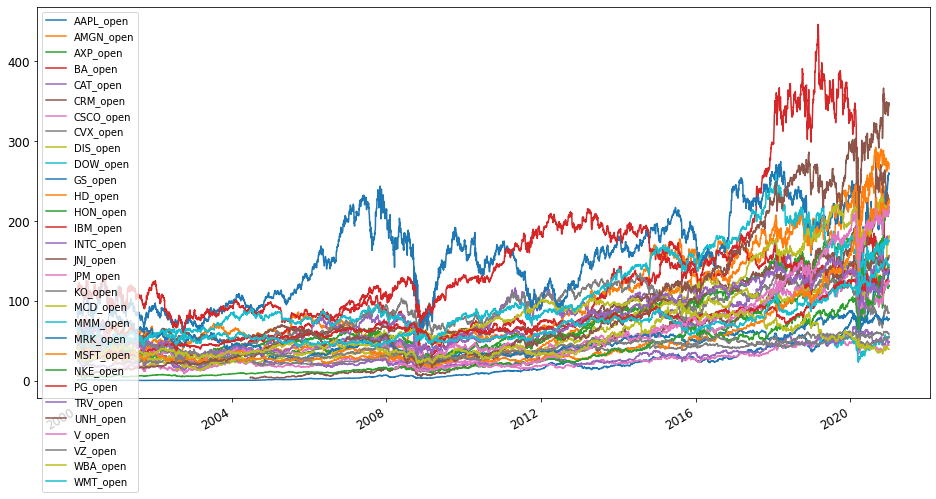

In [ ]:
fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1,1,1) 
explore_data.iloc[:,0::6].plot(ax=ax)

In [ ]:
explore_data.describe()

,AAPL_open,AAPL_high,AAPL_low,AAPL_close,AAPL_adjclose,AAPL_volume,AMGN_open,AMGN_high,AMGN_low,AMGN_close,AMGN_adjclose,AMGN_volume,AXP_open,AXP_high,AXP_low,AXP_close,AXP_adjclose,AXP_volume,BA_open,BA_high,BA_low,BA_close,BA_adjclose,BA_volume,CAT_open,CAT_high,CAT_low,CAT_close,CAT_adjclose,CAT_volume,CRM_open,CRM_high,CRM_low,CRM_close,CRM_adjclose,CRM_volume,CSCO_open,CSCO_high,CSCO_low,CSCO_close,...,PG_low,PG_close,PG_adjclose,PG_volume,TRV_open,TRV_high,TRV_low,TRV_close,TRV_adjclose,TRV_volume,UNH_open,UNH_high,UNH_low,UNH_close,UNH_adjclose,UNH_volume,V_open,V_high,V_low,V_close,V_adjclose,V_volume,VZ_open,VZ_high,VZ_low,VZ_close,VZ_adjclose,VZ_volume,WBA_open,WBA_high,WBA_low,WBA_close,WBA_adjclose,WBA_volume,WMT_open,WMT_high,WMT_low,WMT_close,WMT_adjclose,WMT_volume
count,5284.000000,5284.000000,5284.000000,5284.000000,5284.000000,5.284000e+03,5284.000000,5284.000000,5284.000000,5284.000000,5284.000000,5.284000e+03,5284.000000,5284.000000,5284.000000,5284.000000,5284.000000,5.284000e+03,5284.000000,5284.000000,5284.000000,5284.000000,5284.000000,5.284000e+03,5284.000000,5284.000000,5284.000000,5284.000000,5284.000000,5.284000e+03,4162.000000,4162.000000,4162.000000,4162.000000,4162.000000,4.162000e+03,5284.000000,5284.000000,5284.000000,5284.000000,...,5284.000000,5284.000000,5284.000000,5.284000e+03,5284.000000,5284.000000,5284.000000,5284.000000,5284.000000,5.284000e+03,5284.000000,5284.000000,5284.000000,5284.000000,5284.000000,5.284000e+03,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3.221000e+03,5284.000000,5284.000000,5284.000000,5284.000000,5284.000000,5.284000e+03,5284.000000,5284.000000,5284.000000,5284.000000,5284.000000,5.284000e+03,5284.000000,5284.000000,5284.000000,5284.000000,5284.000000,5.284000e+03
mean,18.722589,18.922397,18.520437,18.728925,17.662635,4.453021e+08,101.245228,102.400041,100.067812,101.243748,86.789774,6.934174e+06,60.823903,61.461045,60.174380,60.824495,53.302041,6.718996e+06,114.730510,116.018157,113.375828,114.706049,100.453512,5.810430e+06,74.861897,75.681906,73.983561,74.857923,60.133190,5.934404e+06,58.828758,59.576794,58.012581,58.837374,58.837374,6.947260e+06,27.620066,27.981481,27.254179,27.615056,...,68.093796,68.632790,53.548554,9.392802e+06,71.774466,72.430974,71.113028,71.791918,59.150090,2.458867e+06,87.606402,88.537206,86.652924,87.625824,80.791612,6.763169e+06,73.670606,74.336995,72.978630,73.678449,71.672777,1.674037e+07,41.786840,42.166561,41.379117,41.787536,27.190615,1.354210e+07,48.034058,48.552763,47.511922,48.049346,38.828709,5.446092e+06,66.520945,67.122554,65.935509,66.533948,54.803722,1.096857e+07
std,23.818522,24.104280,23.529615,23.829196,23.561305,3.911793e+08,57.421515,57.950461,56.868708,57.443992,56.661558,5.375133e+06,26.075365,26.188894,25.953916,26.064814,27.338409,5.469943e+06,93.811017,94.822920,92.739168,93.795376,95.874151,7.073647e+06,38.337690,38.676536,37.967806,38.333844,38.593407,3.720871e+06,57.373901,58.048193,56.552152,57.338237,57.338237,5.398013e+06,12.345341,12.544585,12.117229,12.336265,...,22.984217,23.109132,27.098180,5.931931e+06,35.672512,35.827790,35.496103,35.678367,37.538634,1.782293e+06,85.239758,86.116236,84.314142,85.242193,83.851132,4.506550e+06,57.670187,58.164903,57.125584,57.657841,57.607466,2.186791e+07,9.736014,9.780150,9.700484,9.741783,13.349385,1.139998e+07,18.025289,18.140269,17.893403,18.016951,17.587080,3.883259e+06,21.855107,22.009830,21.714623,21.863265,25.582711,6.783911e+06
min,0.231964,0.235536,0.227143,0.234286,0.201463,3.934000e+07,31.209999,33.759998,30.570000,31.070000,24.414650,2.019000e+05,9.990000,10.660000,9.710000,10.260000,8.382245,7.070000e+05,25.000000,25.420000,24.730000,25.059999,16.991474,5.029000e+05,15.031250,15.062500,14.500000,14.906250,8.649397,5.857000e+05,2.400000,2.462500,2.250000,2.397500,2.397500,4.636000e+05,8.450000,9.210000,8.120000,8.600000,...,26.375000,26.812500,15.209909,1.030400e+06,21.375000,22.500000,21.312500,21.750000,12.531026,2.677000e+05,5.953125,6.1

In [ ]:
cols=explore_data.isna().any()
filtered_cols=cols[cols].index
print(filtered_cols)
print(explore_data[filtered_cols].apply(pd.Series.first_valid_index))

Index(['CRM_open', 'CRM_high', 'CRM_low', 'CRM_close', 'CRM_adjclose',
       'CRM_volume', 'DOW_open', 'DOW_high', 'DOW_low', 'DOW_close',
       'DOW_adjclose', 'DOW_volume', 'V_open', 'V_high', 'V_low', 'V_close',
       'V_adjclose', 'V_volume'],
      dtype='object')
CRM_open       2004-06-23
CRM_high       2004-06-23
CRM_low        2004-06-23
CRM_close      2004-06-23
CRM_adjclose   2004-06-23
CRM_volume     2004-06-23
DOW_open       2019-03-20
DOW_high       2019-03-20
DOW_low        2019-03-20
DOW_close      2019-03-20
DOW_adjclose   2019-03-20
DOW_volume     2019-03-20
V_open         2008-03-19
V_high         2008-03-19
V_low          2008-03-19
V_close        2008-03-19
V_adjclose     2008-03-19
V_volume       2008-03-19
dtype: datetime64[ns]


In [ ]:
# for column in explore_data.columns:
#   explore_data[column].idmin()
  

#Process data

Exclude some data

In [ ]:
#DOW ticker is too recent to be useful
not_DOW_cols = [col for col in raw_data.columns if 'DOW' not in col] 
raw_data_filtered=raw_data[not_DOW_cols].copy()

In [ ]:
train_data=raw_data_filtered.loc[INICIAL_DATE:CUT_TRAIN_DATE].reset_index(drop=True, inplace=False)
test_data=raw_data_filtered.loc[CUT_TRAIN_DATE:FINAL_DATE].reset_index(drop=True, inplace=False)

##Preprocess pipeline

In [ ]:
Y_COLS=[count for count, col in enumerate(train_data.columns) if '_open' in col]
X_COLS=[count for count, col in enumerate(train_data.columns) if '_open' not in col]

In [ ]:
train_data.columns

Index(['AAPL_open', 'AAPL_high', 'AAPL_low', 'AAPL_close', 'AAPL_adjclose',
       'AAPL_volume', 'AMGN_open', 'AMGN_high', 'AMGN_low', 'AMGN_close',
       ...
       'WBA_low', 'WBA_close', 'WBA_adjclose', 'WBA_volume', 'WMT_open',
       'WMT_high', 'WMT_low', 'WMT_close', 'WMT_adjclose', 'WMT_volume'],
      dtype='object', length=174)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

scaler=MinMaxScaler(feature_range = (0, 1))
reversible=Pipeline([
        ('minmax_scaler', scalerxs), 
    ])

pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="constant", fill_value=0)),
        ('reversible', reversible), 
    ])

full_pipeline = ColumnTransformer([
        ("y_cols", pipeline, Y_COLS),
        ("x_cols", pipeline, X_COLS),
    ])


train_data_tr=full_pipeline.fit_transform(train_data)
"""
train_data_tr=pd.DataFrame(
    train_data_tr,
    columns=list(train_data.columns),
    index=train_data.index)
"""

print(train_data_tr)
print(train_data_tr.shape)

[[0.01225866 0.21874473 0.36543863 ... 0.36478149 0.2174758  0.06689329]
 [0.01278307 0.17363109 0.33966357 ... 0.32762335 0.19425378 0.04974598]
 [0.01208385 0.15777083 0.32616236 ... 0.30811532 0.18206229 0.05263341]
 ...
 [0.68118636 0.90464113 0.82125003 ... 0.74108197 0.80488938 0.08276679]
 [0.68566749 0.90633282 0.81865384 ... 0.75624256 0.8182637  0.05249727]
 [0.66983123 0.90966002 0.80692313 ... 0.7590665  0.82075521 0.06460107]]
(4780, 174)


In [ ]:
full_pipeline.named_transformers_["y_cols"]["reversible"]["minmax_scaler"].min_.shape

(29,)

##Formatting for LSTM

In [ ]:
def get_data_for_LSTM(data, timesteps, y_cols):
  X_data = []
  y_data = []
  for i in range(timesteps, len(data)):
      X_data.append(data[i-timesteps:i])
      y_data.append(data[i, y_cols])

  X_data = np.vstack(X_data)
  y_data = np.vstack(y_data)
  X_data = X_data.reshape((len(data)-timesteps, timesteps, X_data.shape[1]))
  return X_data ,y_data

In [ ]:
X_train, y_train = get_data_for_LSTM(train_data_tr, TIMESTEPS, Y_COLS)
print(X_train.shape)
print(y_train.shape)

(4630, 150, 174)
(4630, 29)


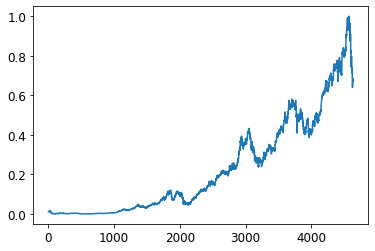

In [ ]:
plt.plot(y_train[:,0])

#Train model

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.utils.vis_utils import plot_model

In [ ]:
#some hyperparams
MODEL_VERSION=2

LAYERS=5
UNITS=50
DROPOUT=0.5
OPTIMIZER='adam'
LOSS='mean_squared_error'

EPOCHS=120
BATCH_SIZE=32

In [ ]:
keras.backend.clear_session()

##Define model

In [ ]:
def get_LSTM_model(input_shape, output_units,
                   layers=4, units=50, dropout=0.3,
                   optimizer='adam', loss='mean_squared_error'):
  model = Sequential()

  for i in range(0, layers):
    if i==0:
      model.add(LSTM(units = units, return_sequences = True, input_shape = input_shape , dropout=dropout))
    else:
      model.add(LSTM(units = units, return_sequences = (layers != i+1), dropout=dropout))

  model.add(Dense(units = output_units))
  model.compile(optimizer = 'adam', loss = 'mean_squared_error')
  return model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 150, 50)           45000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 150, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 150, 50)           20200     
_________________________________________________________________
lstm_3 (LSTM)                (None, 150, 50)           20200     
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 29)                1479      
Total params: 127,279
Trainable params: 127,279
Non-trainable params: 0
__________________________________________________

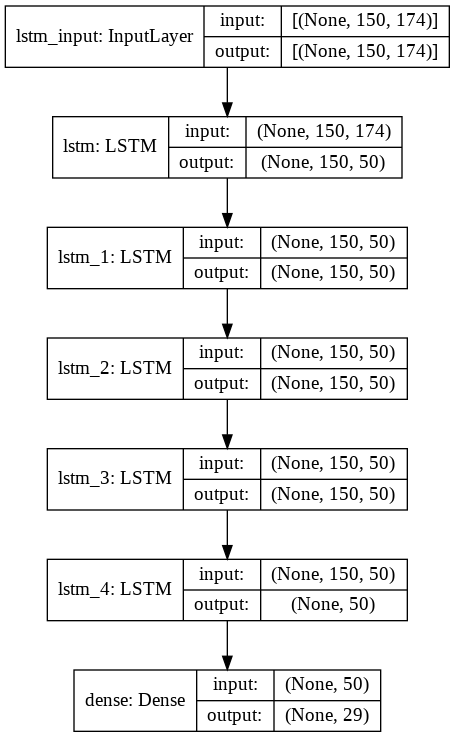

In [ ]:
model=get_LSTM_model(
      X_train[0].shape, y_train.shape[1],
      layers=LAYERS, units=UNITS, dropout=DROPOUT,
      optimizer=OPTIMIZER, loss=LOSS
    )

print(model.summary())
plot_model(model, to_file='{}/model_plot_v{}.png'.format(IMAGES_PATH, MODEL_VERSION), show_shapes=True, show_layer_names=True)

## Train Model

In [ ]:
model.fit(X_train, y_train, epochs = EPOCHS, batch_size = BATCH_SIZE, use_multiprocessing=True)

Epoch 1/120
145/145 [==============================] - 31s 31ms/step - loss: 0.0442
Epoch 2/120
145/145 [==============================] - 4s 30ms/step - loss: 0.0045
Epoch 3/120
145/145 [==============================] - 4s 29ms/step - loss: 0.0034
Epoch 4/120
145/145 [==============================] - 4s 29ms/step - loss: 0.0028
Epoch 5/120
145/145 [==============================] - 4s 29ms/step - loss: 0.0024
Epoch 6/120
145/145 [==============================] - 4s 29ms/step - loss: 0.0023
Epoch 7/120
145/145 [==============================] - 4s 29ms/step - loss: 0.0021
Epoch 8/120
145/145 [==============================] - 4s 29ms/step - loss: 0.0019
Epoch 9/120
145/145 [==============================] - 4s 29ms/step - loss: 0.0019
Epoch 10/120
145/145 [==============================] - 4s 29ms/step - loss: 0.0018
Epoch 11/120
145/145 [==============================] - 4s 30ms/step - loss: 0.0017
Epoch 12/120
145/145 [==============================] - 4s 29ms/step - loss: 0.0016


In [ ]:
model.save(create_drive_dirs(f"models/v{MODEL_VERSION}"))

INFO:tensorflow:Assets written to: drive/MyDrive/1l Proyectos personales/ADPM/MVP/models/v2/assets


INFO:tensorflow:Assets written to: drive/MyDrive/1l Proyectos personales/ADPM/MVP/models/v2/assets


##Evaluate

In [ ]:
test_data_comp=pd.concat((train_data[-TIMESTEPS:], test_data), axis = 0)
test_data_tr=full_pipeline.transform(test_data_comp)

X_test, y_test = get_data_for_LSTM(test_data_tr, TIMESTEPS, Y_COLS)

print(X_test.shape)
print(y_test.shape)

(505, 150, 174)
(505, 29)


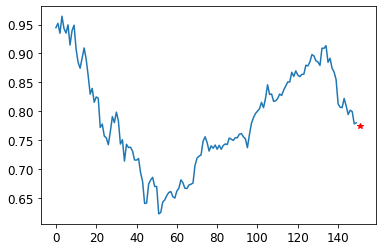

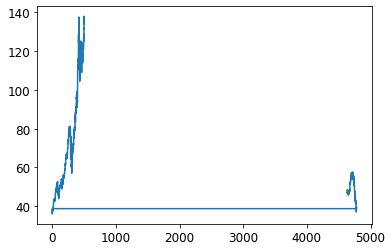

In [ ]:
#quick check of the previous step
n=100
stock=0
plt.plot(X_test[n][:,stock*6])
plt.plot(TIMESTEPS+1,y_test[n,stock],"r*", linewidth=2,)
plt.show()
test_data_comp.iloc[:,stock*6].plot()

In [ ]:
untr_predicted_price = model.predict(X_test)
test_predicted_price = full_pipeline.named_transformers_["y_cols"]["reversible"].inverse_transform(untr_predicted_price)
untr_train_predicted_price = model.predict(X_train)
train_predicted_price = full_pipeline.named_transformers_["y_cols"]["reversible"].inverse_transform(untr_train_predicted_price)

In [ ]:
from sklearn.metrics import mean_absolute_error
print("Train error:")
print(mean_absolute_error(train_data_tr[TIMESTEPS:,Y_COLS],untr_train_predicted_price))
print("Test error:")
print(mean_absolute_error(test_data_tr[TIMESTEPS:,Y_COLS],untr_predicted_price))

Train error:
0.18217414013891806
Test error:
0.6154164141149597


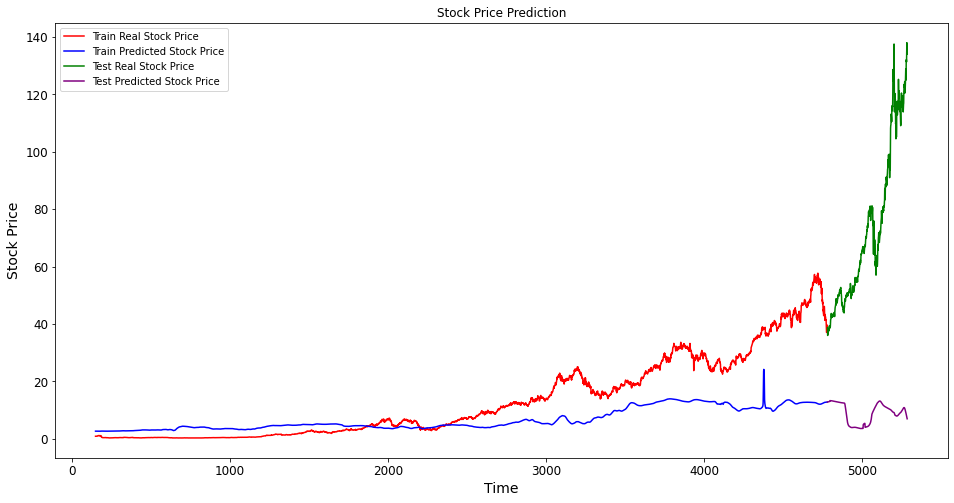

Saving figure 0


<Figure size 432x288 with 0 Axes>

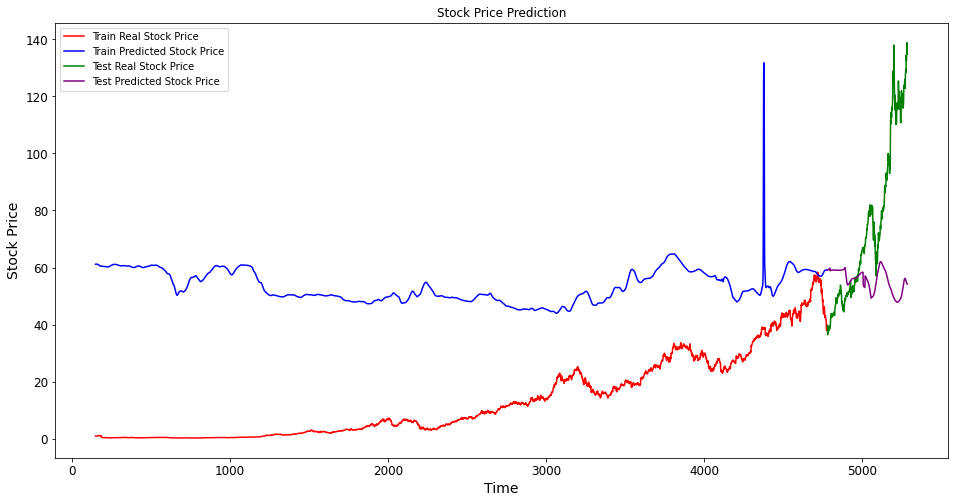

Saving figure 1


<Figure size 432x288 with 0 Axes>

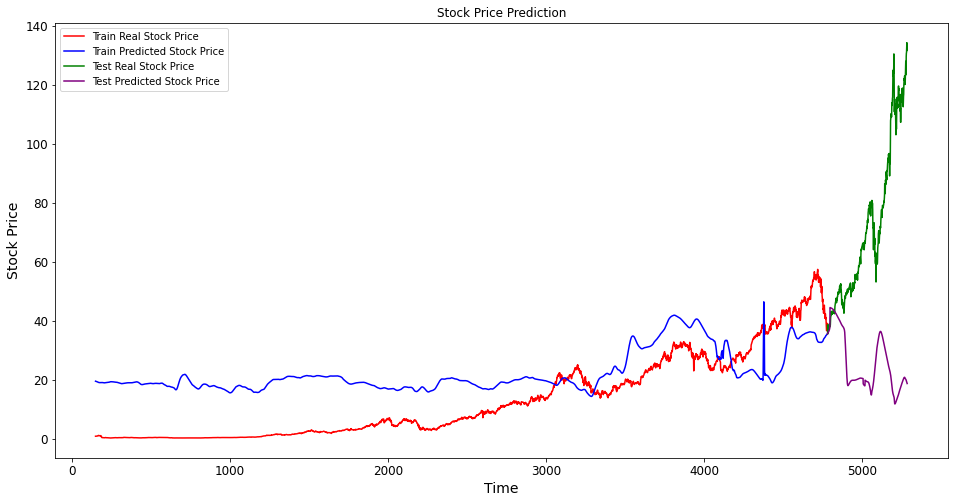

Saving figure 2


<Figure size 432x288 with 0 Axes>

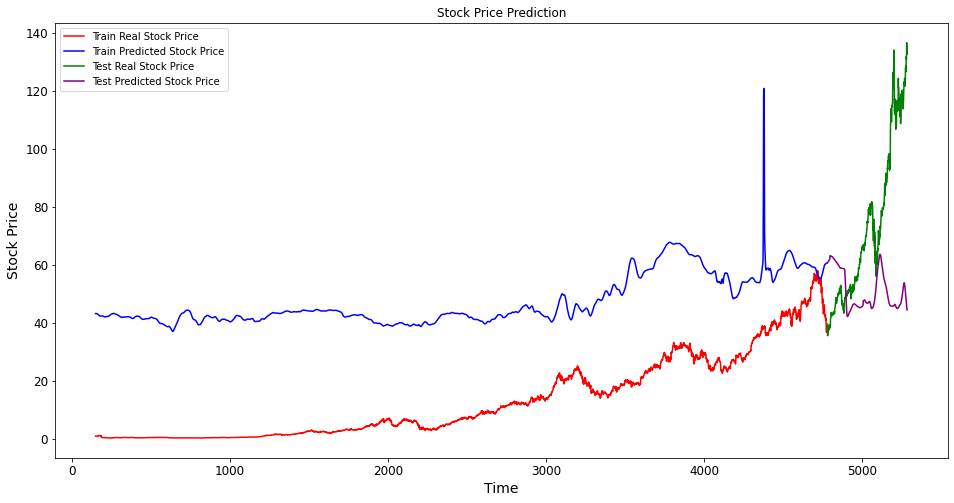

Saving figure 3


<Figure size 432x288 with 0 Axes>

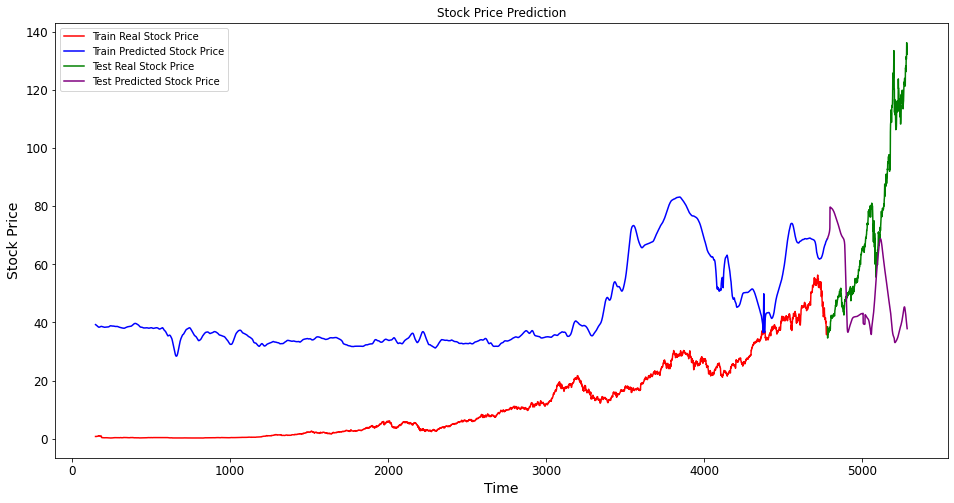

Saving figure 4


<Figure size 432x288 with 0 Axes>

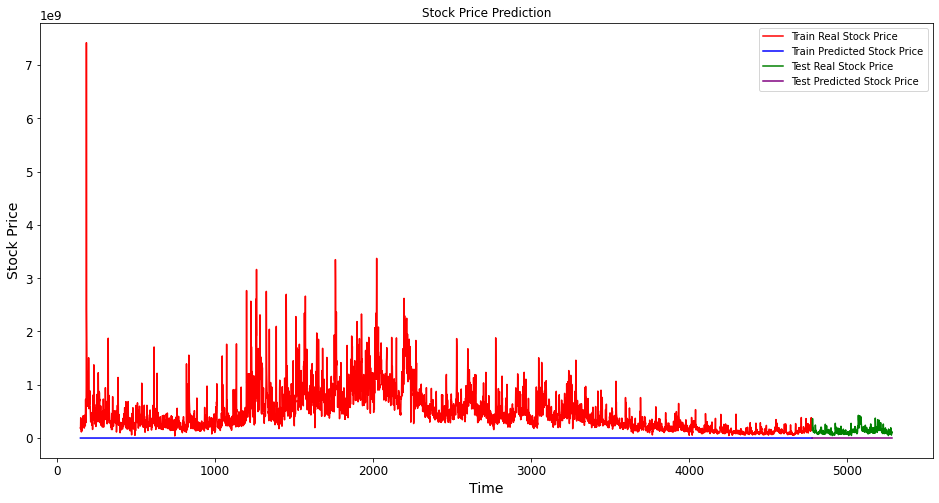

Saving figure 5


<Figure size 432x288 with 0 Axes>

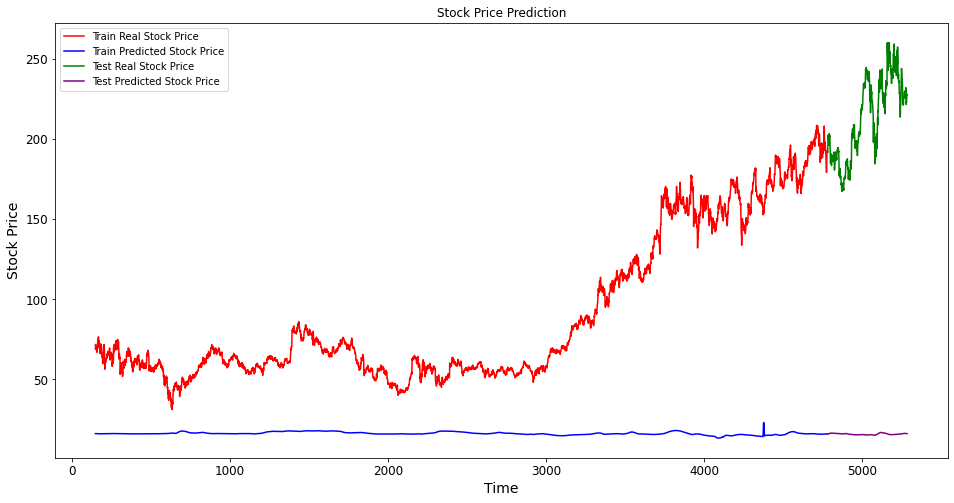

Saving figure 6


<Figure size 432x288 with 0 Axes>

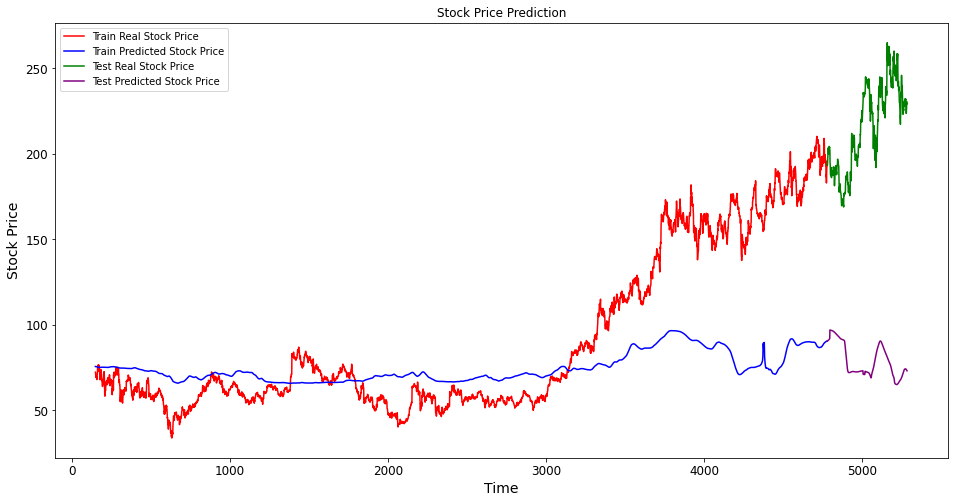

Saving figure 7


<Figure size 432x288 with 0 Axes>

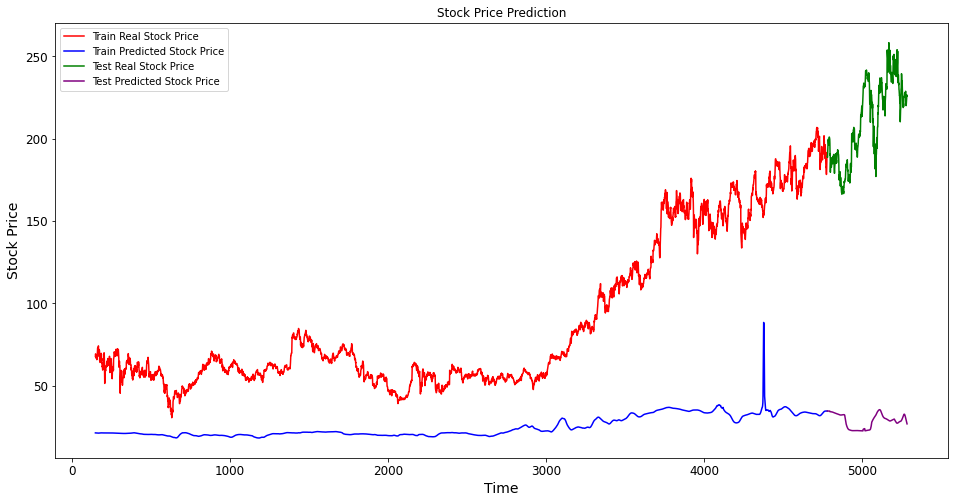

Saving figure 8


<Figure size 432x288 with 0 Axes>

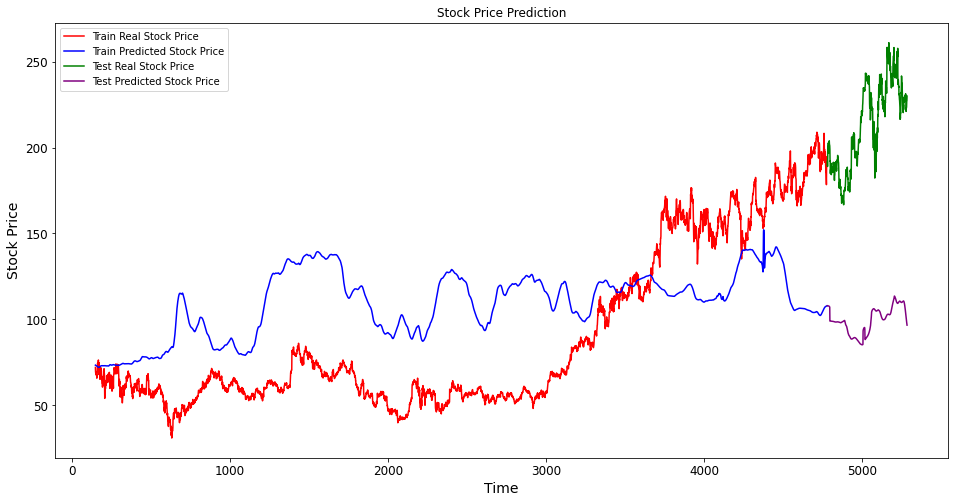

Saving figure 9


<Figure size 432x288 with 0 Axes>

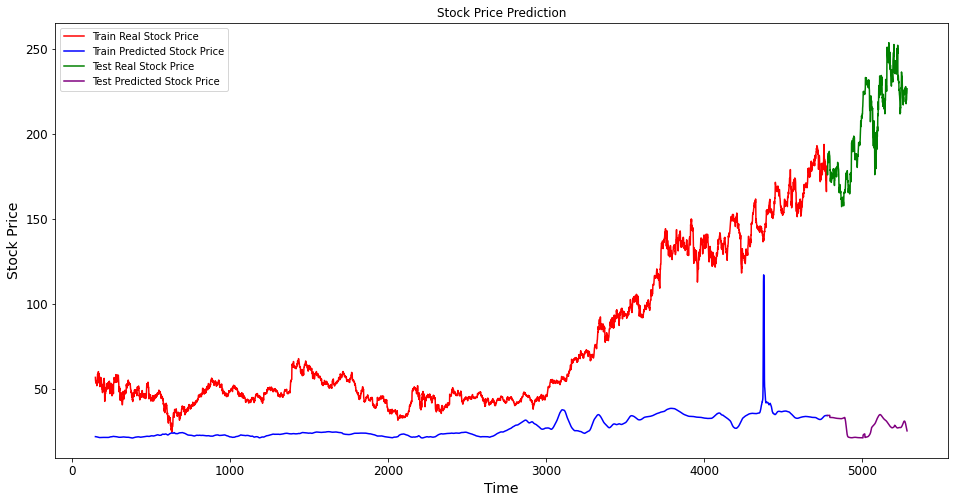

Saving figure 10


<Figure size 432x288 with 0 Axes>

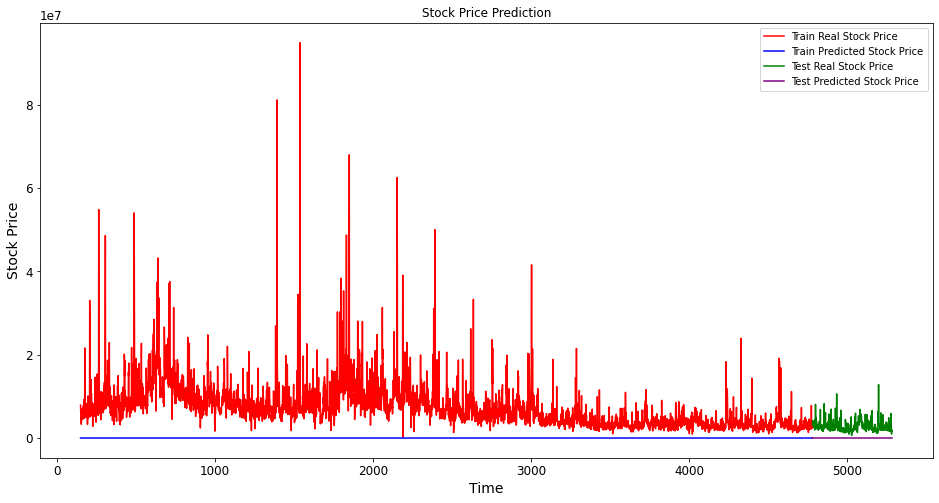

Saving figure 11


<Figure size 432x288 with 0 Axes>

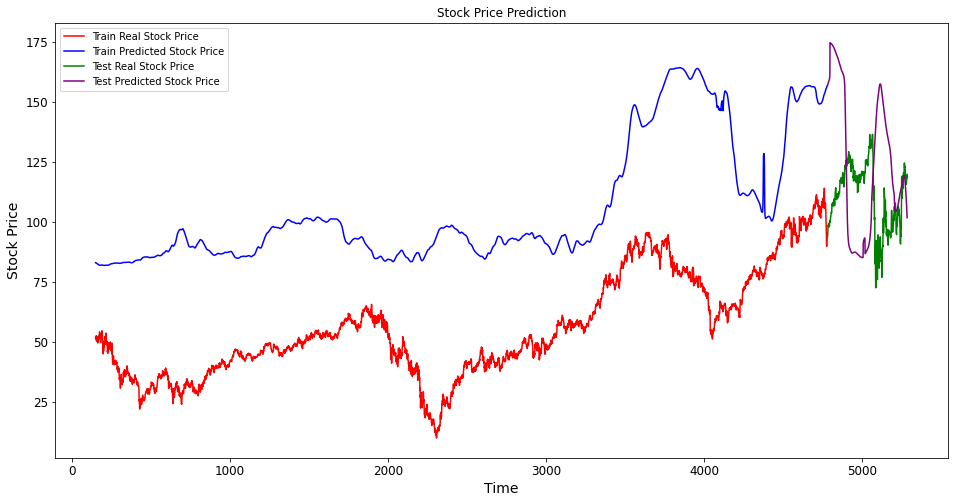

Saving figure 12


<Figure size 432x288 with 0 Axes>

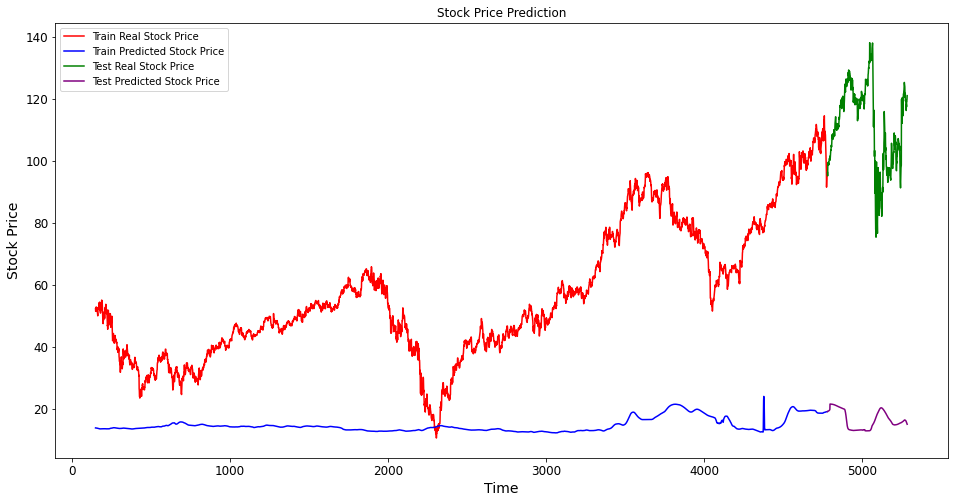

Saving figure 13


<Figure size 432x288 with 0 Axes>

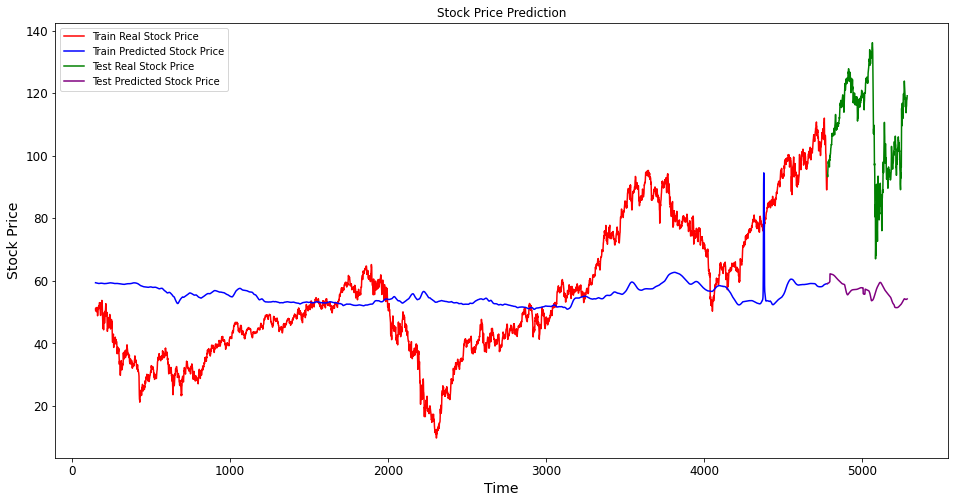

Saving figure 14


<Figure size 432x288 with 0 Axes>

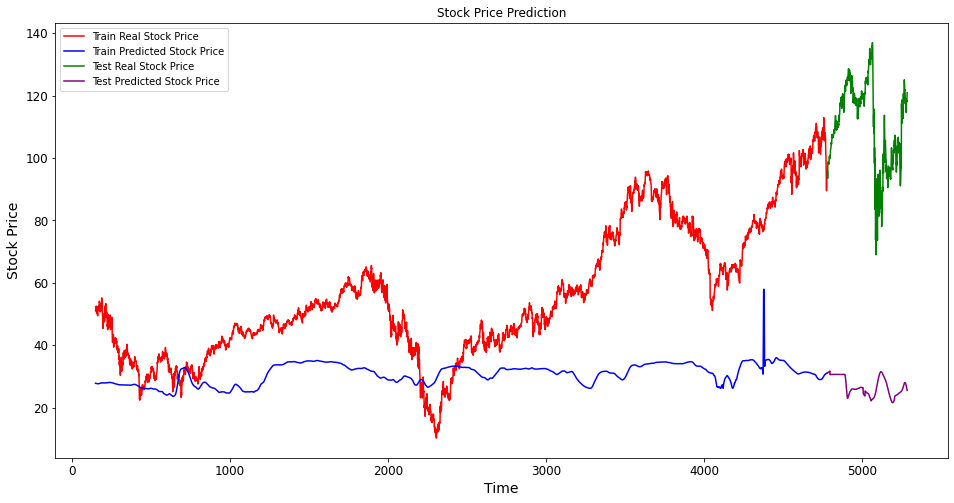

Saving figure 15


<Figure size 432x288 with 0 Axes>

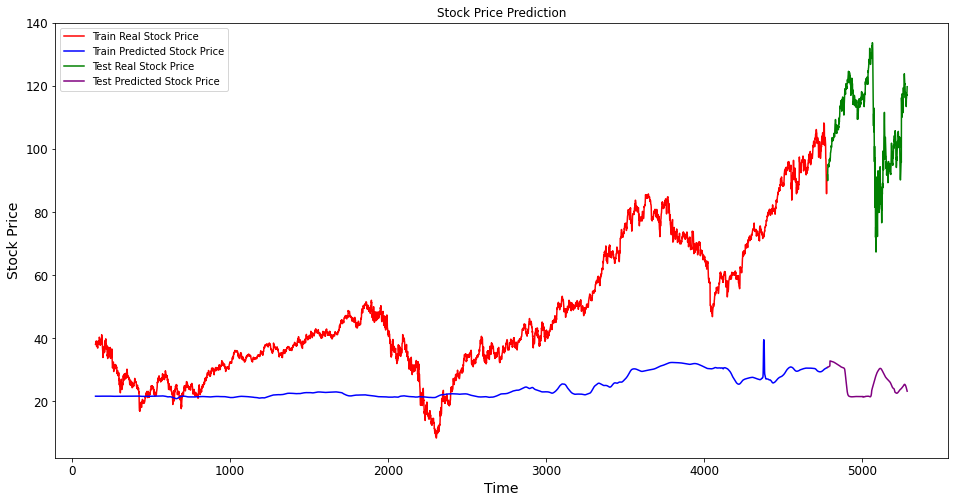

Saving figure 16


<Figure size 432x288 with 0 Axes>

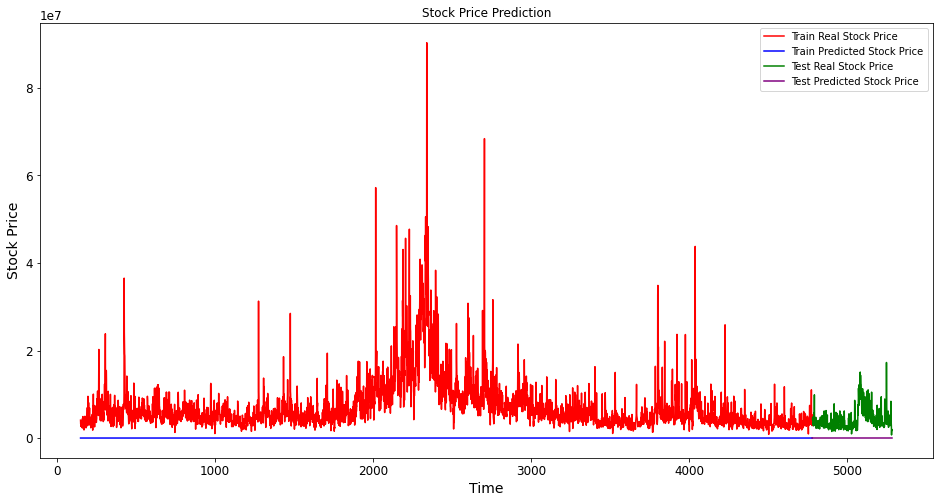

Saving figure 17


<Figure size 432x288 with 0 Axes>

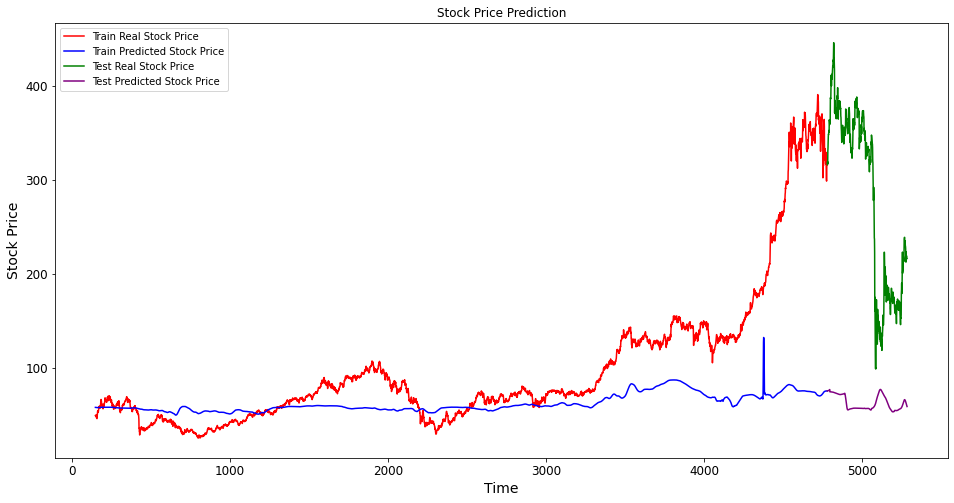

Saving figure 18


<Figure size 432x288 with 0 Axes>

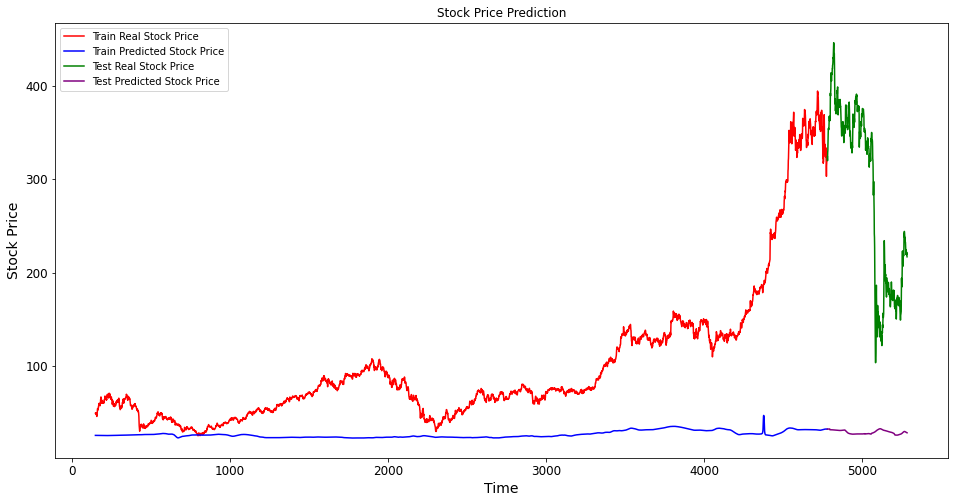

Saving figure 19


<Figure size 432x288 with 0 Axes>

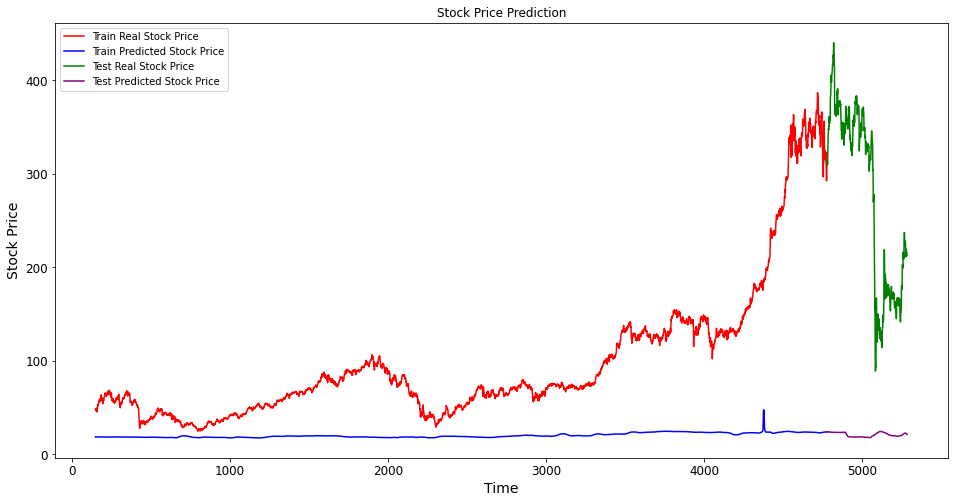

Saving figure 20


<Figure size 432x288 with 0 Axes>

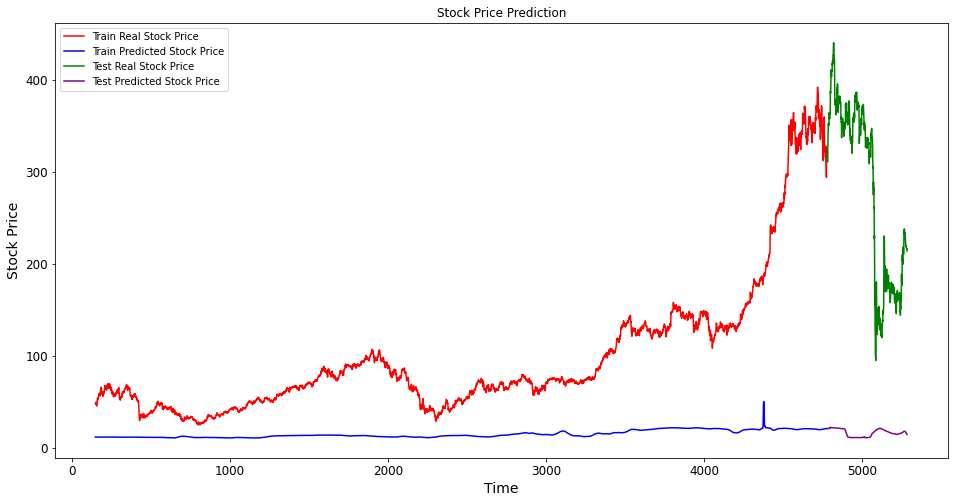

Saving figure 21


<Figure size 432x288 with 0 Axes>

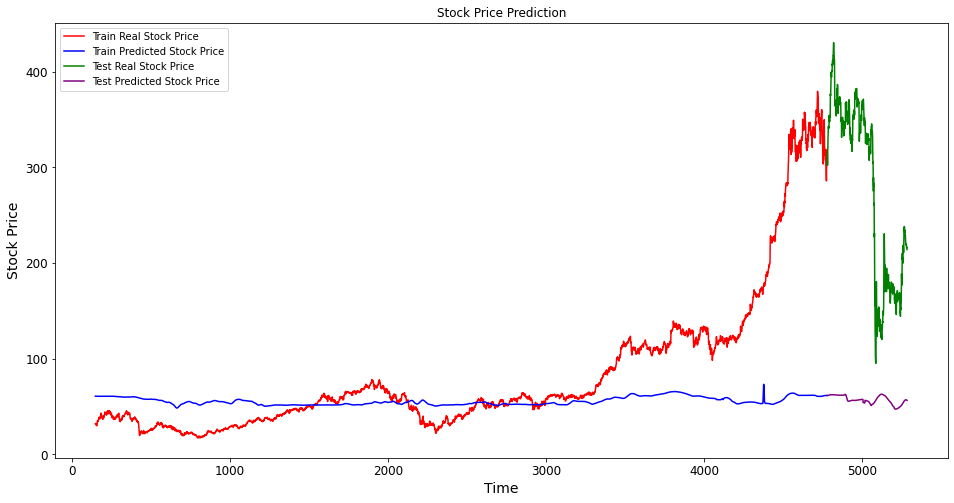

Saving figure 22


<Figure size 432x288 with 0 Axes>

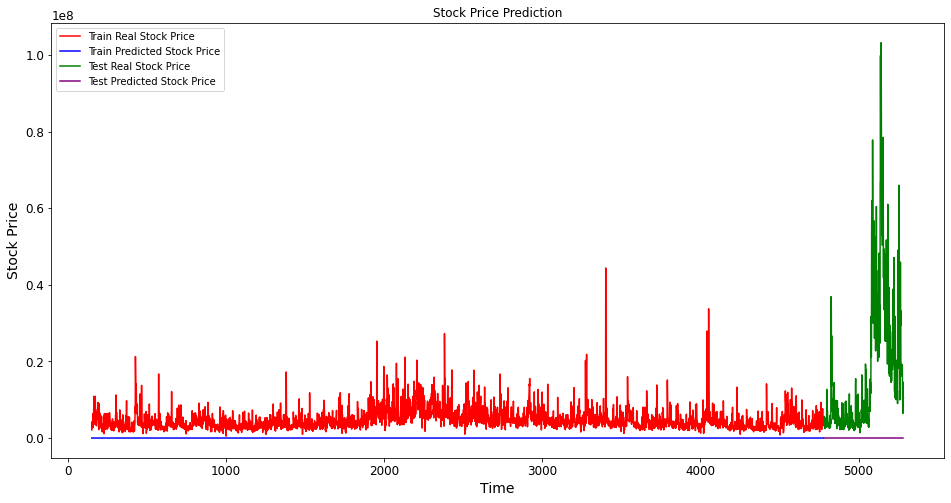

Saving figure 23


<Figure size 432x288 with 0 Axes>

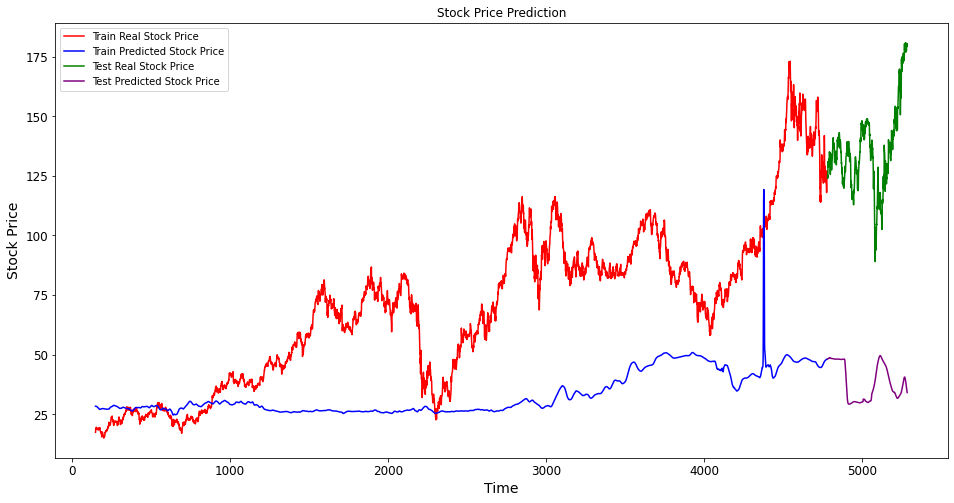

Saving figure 24


<Figure size 432x288 with 0 Axes>

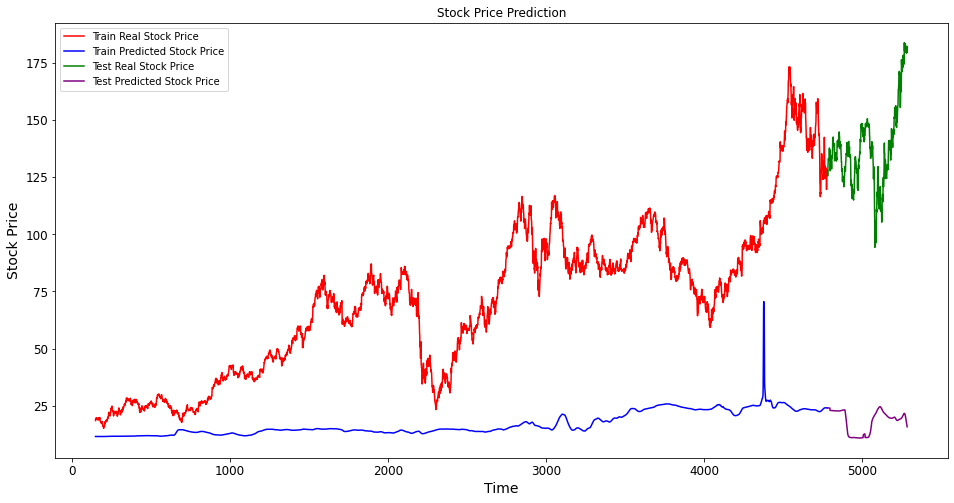

Saving figure 25


<Figure size 432x288 with 0 Axes>

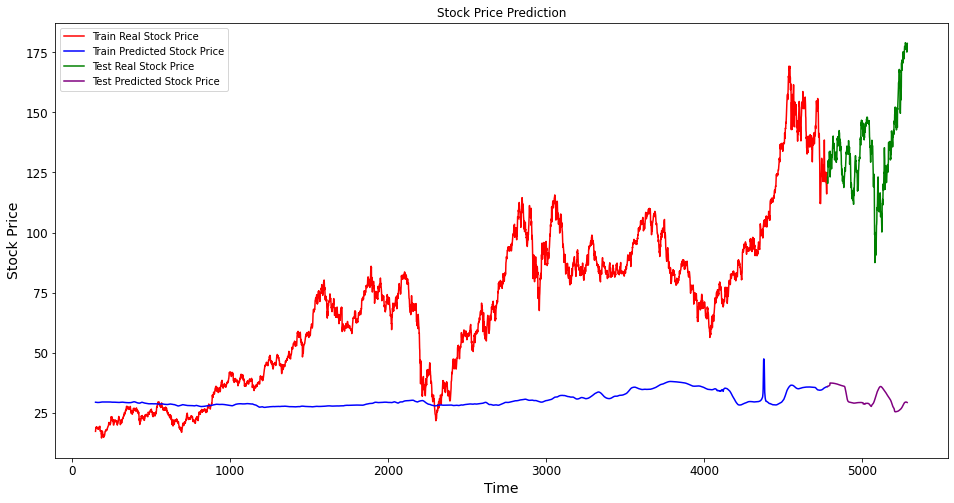

Saving figure 26


<Figure size 432x288 with 0 Axes>

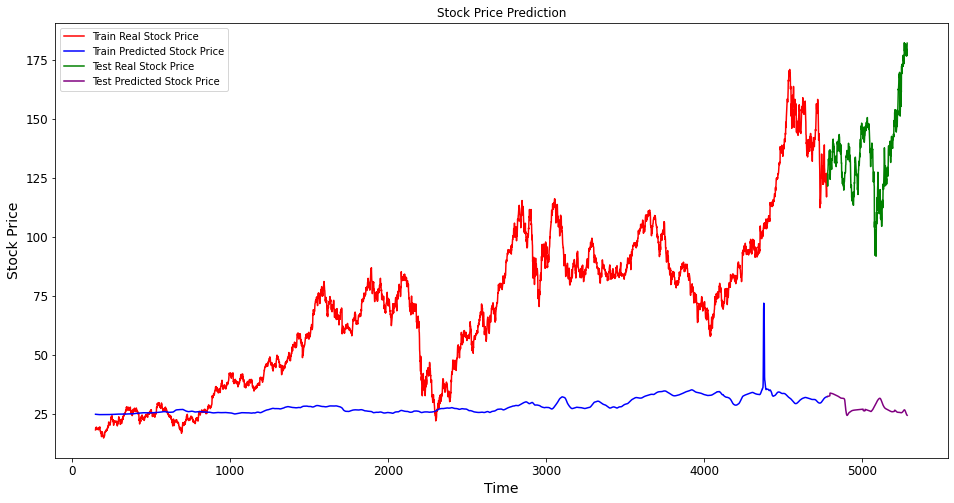

Saving figure 27


<Figure size 432x288 with 0 Axes>

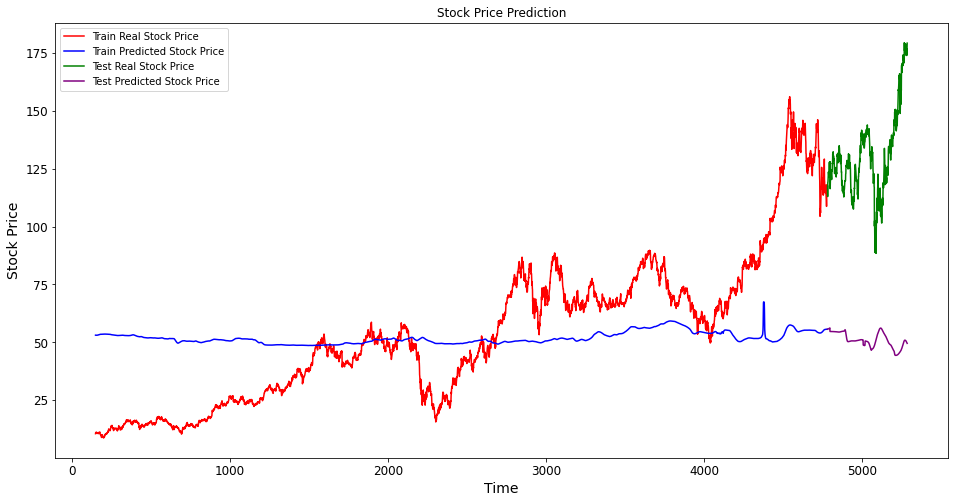

Saving figure 28


<Figure size 432x288 with 0 Axes>

In [ ]:
# Visualising the results
for i in range(len(y_train[0])):
  stock=i

  fig = plt.figure(figsize = (16,8))
  ax = fig.add_subplot(1,1,1) 

  plt.plot(train_data.iloc[TIMESTEPS:,stock], color = 'red', label = 'Train Real Stock Price')
  plt.plot(train_data[TIMESTEPS:].index, train_predicted_price[:,stock], color = 'blue', label = 'Train Predicted Stock Price')
  plt.plot(test_data.index + len(train_data), test_data.iloc[:,stock], color = 'green', label = 'Test Real Stock Price')
  plt.plot(test_data.index + len(train_data), test_predicted_price[:,stock], color = 'purple', label = 'Test Predicted Stock Price')
  plt.title('Stock Price Prediction')
  plt.xlabel('Time')
  plt.ylabel('Stock Price')
  plt.legend()
  plt.show()
  save_fig(f"{stock}", f"evaluation_modelv{MODEL_VERSION}")

#Predict


In [ ]:
from tensorflow import keras
model = keras.models.load_model(f"{DRIVE_PATH}/models/v2")
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 150, 50)           45000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 150, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 150, 50)           20200     
_________________________________________________________________
lstm_3 (LSTM)                (None, 150, 50)           20200     
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 29)                1479      
Total params: 127,279
Trainable params: 127,279
Non-trainable params: 0
__________________________________________________